# Importation des module

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("✅ MPS disponible — entraînement sur GPU Apple Silicon")
else:
    device = torch.device("cpu")
    print("⚠️ MPS non disponible — fallback sur CPU")


✅ MPS disponible — entraînement sur GPU Apple Silicon


In [3]:


print("PyTorch version:", torch.__version__)
print("MPS disponible :", torch.backends.mps.is_available())
print("MPS prêt :", torch.backends.mps.is_built())


PyTorch version: 2.9.0
MPS disponible : True
MPS prêt : True


# Téléchargement des Data

In [4]:
df_train = pd.read_csv('train_data.csv')
df_train.head()

sequence_id                                           sequence  \
0  8cdfeef009ea  GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...   
1  51e61fbde94d  GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...   
2  25ce8d5109cd  GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...   
3  07dcfb6d1965  GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...   
4  e561cc042a4c  GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...   

  experiment_type dataset_name   reads  signal_to_noise  SN_filter  \
0         2A3_MaP      15k_2A3    2343            0.944          0   
1         2A3_MaP      15k_2A3    5326            1.933          1   
2         2A3_MaP      15k_2A3    4647            2.347          1   
3         2A3_MaP      15k_2A3  102843           11.824          1   
4         2A3_MaP      15k_2A3    7665            3.519          1   

   reactivity_0001  reactivity_0002  reactivity_0003  ...  \
0              NaN              NaN              NaN  ...   
1              NaN              NaN              NaN  ...   
2              NaN              NaN              NaN  ...   
3              NaN              NaN              NaN  ...   
4              NaN              NaN              NaN  ...   

   reactivity_error_0197  reactivity_error_0198  reactivity_error_0199  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   reactivity_error_0200  reactivity_error_0201  reactivity_error_0202  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   reactivity_error_0203  reactivity_error_0204  reactivity_error_0205  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   reactivity_error_0206  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 419 columns]

In [5]:
df_test = pd.read_csv('test_sequences.csv')
df_test.head()

id_min  id_max   sequence_id  \
0       0     176  eee73c1836bc   
1     177     353  d2a929af7a97   
2     354     530  d39a4425ff45   
3     531     707  1fc41e92d553   
4     708     884  1d0826fb892f   

                                            sequence  future  
0  GGGAACGACUCGAGUAGAGUCGAAAAUUUCCUUCCAAAUCCUGAGG...       0  
1  GGGAACGACUCGAGUAGAGUCGAAAAUGUAAUCAGAUUGCUUCUCC...       0  
2  GGGAACGACUCGAGUAGAGUCGAAAAAACACAUGAAUUUGAGGGUU...       0  
3  GGGAACGACUCGAGUAGAGUCGAAAAUCAGAGCUGGCAAAUGGAUG...       0  
4  GGGAACGACUCGAGUAGAGUCGAAAAUUUGGUAUUUGAUGCAUUAA...       0

In [5]:
df_test.describe().style.background_gradient(cmap='summer')

In [6]:
df_train.describe().style.background_gradient(cmap='summer')

# Exploration 

## Base composition

### Visualize the distribution of different bases (A, C, G, U) in the sequences

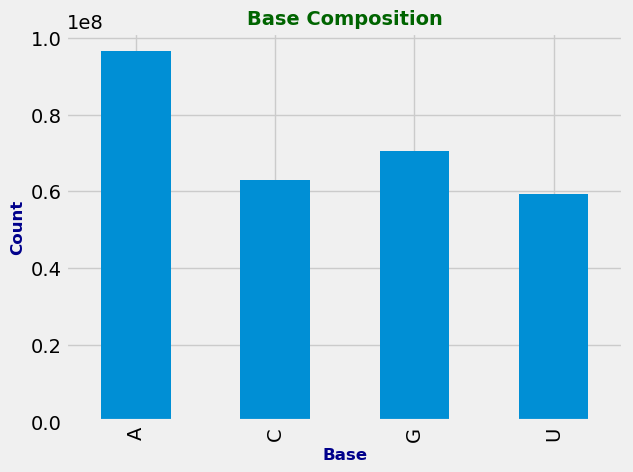

In [7]:
base_counts = df_train['sequence'].apply(lambda x: pd.Series(list(x)).value_counts()).sum()
base_counts.plot(kind='bar')
plt.xlabel('Base', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Base Composition', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
#plt.savefig('Base Composition.png')

# Show the plot
plt.show()

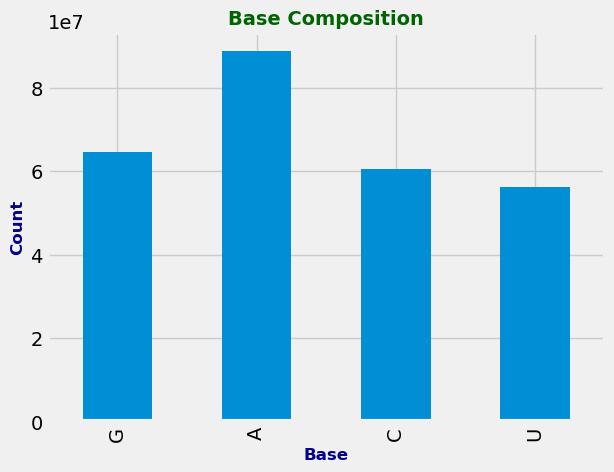

In [8]:
base_counts = df_test['sequence'].apply(lambda x: pd.Series(list(x)).value_counts()).sum()
base_counts.plot(kind='bar')
plt.xlabel('Base', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Base Composition', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
#plt.savefig('Base Composition.png')

# Show the plot
plt.show()

## Sequence Length Distribution

### Create a histogram to show the distribution of sequence lengths.

📊 Statistiques longueurs TRAIN
count    1.643680e+06
mean     1.757565e+02
std      8.340652e+00
min      1.150000e+02
25%      1.770000e+02
50%      1.770000e+02
75%      1.770000e+02
max      2.060000e+02
Name: sequence, dtype: float64

📊 Statistiques longueurs TEST
count    1.343823e+06
mean     2.007680e+02
std      2.190916e+01
min      1.770000e+02
25%      2.070000e+02
50%      2.070000e+02
75%      2.070000e+02
max      4.570000e+02
Name: sequence, dtype: float64


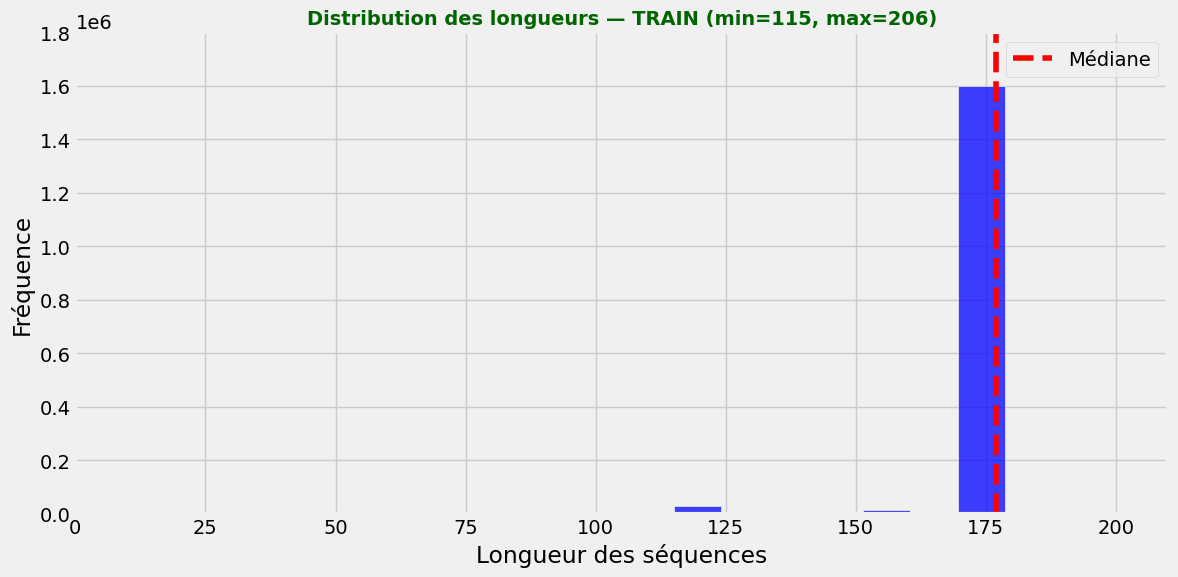

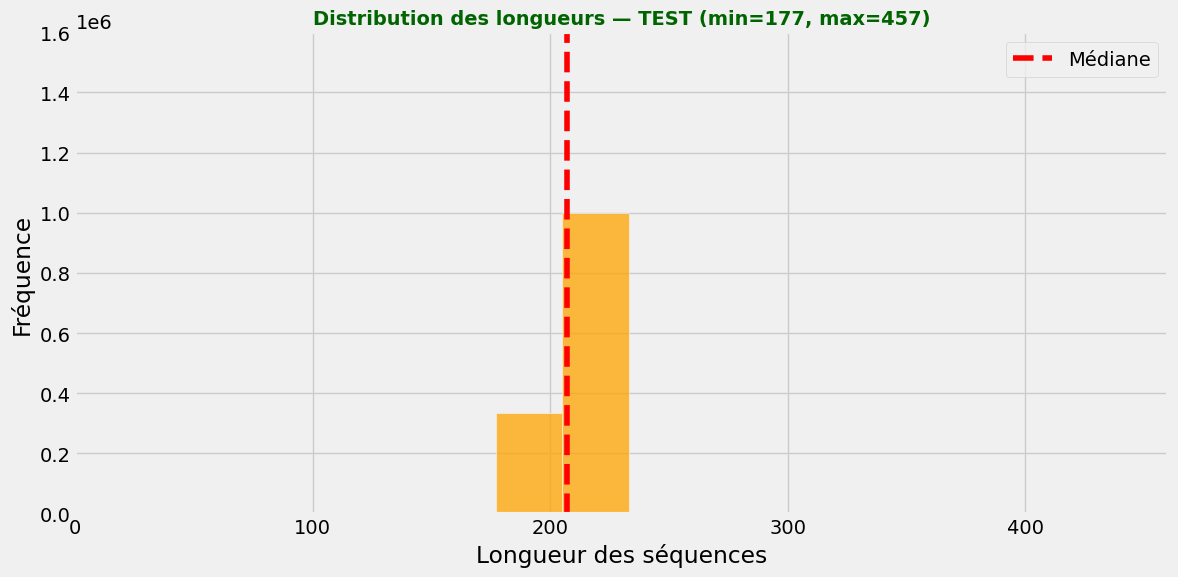

In [9]:
# 📏 Calcul des longueurs
train_lengths = df_train['sequence'].apply(len)
test_lengths = df_test['sequence'].apply(len)

# 📊 Statistiques descriptives
print("📊 Statistiques longueurs TRAIN")
print(train_lengths.describe())
print("\n📊 Statistiques longueurs TEST")
print(test_lengths.describe())

# ⚡ Détermination des bornes communes pour les deux graphiques
min_train = train_lengths.min()
min_test = test_lengths.min()
max_train = train_lengths.max()
max_test = test_lengths.max()

# 📍 Médianes
median_train = train_lengths.median()
median_test = test_lengths.median()

# 🖼️ 1. Distribution pour le TRAIN
plt.figure(figsize=(12,6))
sns.histplot(train_lengths, bins=10, kde=False, color='blue', stat='count')
plt.xlim(0, 210)
plt.ylim(0, 1600000)
plt.yticks(np.arange(0, 1800000+200000, 200000))
plt.axvline(train_lengths.median(), color='red', linestyle='--', label='Médiane')
plt.title(f'Distribution des longueurs — TRAIN (min={min_train}, max={max_train})', 
          fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Longueur des séquences')
plt.ylabel('Fréquence')
plt.legend()
plt.tight_layout()
plt.show()



# 🖼️ 2. Distribution pour le TEST
plt.figure(figsize=(12,6))
sns.histplot(test_lengths, bins=10, kde=False, color='orange', stat='count')
plt.xlim(0, 460)
plt.ylim(0, 1500000)
plt.yticks(np.arange(0, 1500000+200000, 200000))
plt.axvline(test_lengths.median(), color='red', linestyle='--', label='Médiane')
plt.title(f'Distribution des longueurs — TEST (min={min_test}, max={max_test})', 
          fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Longueur des séquences')
plt.ylabel('Fréquence')
plt.legend()
plt.tight_layout()
plt.show()



## Experiment Type Pie Chart

### Visualize the distribution of experiment types

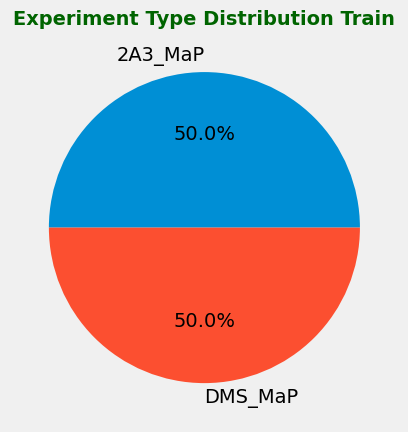

In [10]:
experiment_type_counts = df_train['experiment_type'].value_counts()
plt.pie(experiment_type_counts, labels=experiment_type_counts.index, autopct='%1.1f%%')
plt.title('Experiment Type Distribution Train', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
#plt.savefig('Experiment Type Distribution.png')

# Show the plot
plt.show()

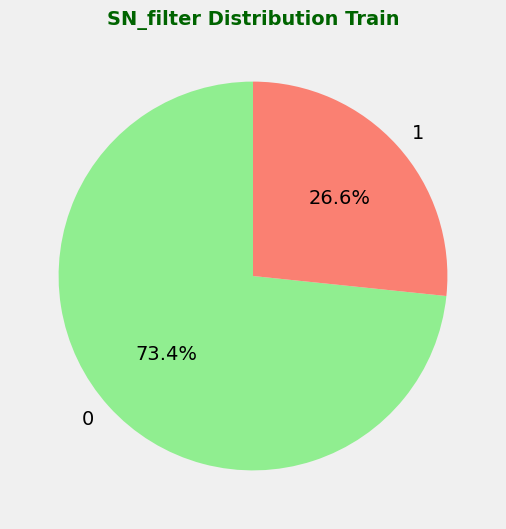

In [11]:
import matplotlib.pyplot as plt

# Comptage des valeurs de SN_filter
sn_filter_counts = df_train['SN_filter'].value_counts()

# Diagramme circulaire
plt.figure(figsize=(6,6))
plt.pie(sn_filter_counts, labels=sn_filter_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','salmon'])
plt.title('SN_filter Distribution Train', fontsize=14, fontweight='bold', color='darkgreen')

# Affichage
plt.show()


## Vérification des valeurs manquantes et des types de données

In [12]:
# Aperçu rapide des types de données et valeurs manquantes
print("=== Types de données ===")
print(df_train.dtypes)

print("\n=== Valeurs manquantes par colonne ===")
print(df_train.isna().sum())


=== Types de données ===
sequence_id               object
sequence                  object
experiment_type           object
dataset_name              object
reads                      int64
                          ...   
reactivity_error_0202    float64
reactivity_error_0203    float64
reactivity_error_0204    float64
reactivity_error_0205    float64
reactivity_error_0206    float64
Length: 419, dtype: object

=== Valeurs manquantes par colonne ===
sequence_id                    0
sequence                       0
experiment_type                0
dataset_name                   0
reads                          0
                          ...   
reactivity_error_0202    1643680
reactivity_error_0203    1643680
reactivity_error_0204    1643680
reactivity_error_0205    1643680
reactivity_error_0206    1643680
Length: 419, dtype: int64


In [13]:
# Aperçu rapide des types de données et valeurs manquantes
print("=== Types de données ===")
print(df_test.dtypes)

print("\n=== Valeurs manquantes par colonne ===")
print(df_test.isna().sum())

=== Types de données ===
id_min          int64
id_max          int64
sequence_id    object
sequence       object
future          int64
dtype: object

=== Valeurs manquantes par colonne ===
id_min         0
id_max         0
sequence_id    0
sequence       0
future         0
dtype: int64


## Plot signal-to-noise ratio against reads.

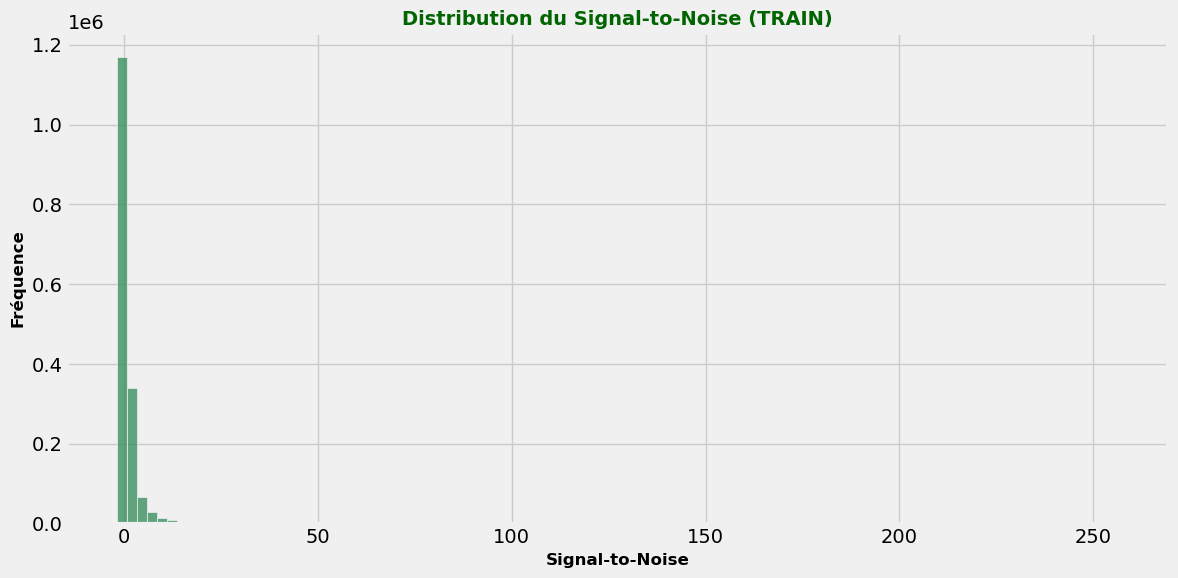

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df_train['signal_to_noise'], bins=100, kde=False, color='seagreen',stat='count')
plt.title('Distribution du Signal-to-Noise (TRAIN)', fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel('Signal-to-Noise', fontsize=12, fontweight='bold')
plt.ylabel('Fréquence', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


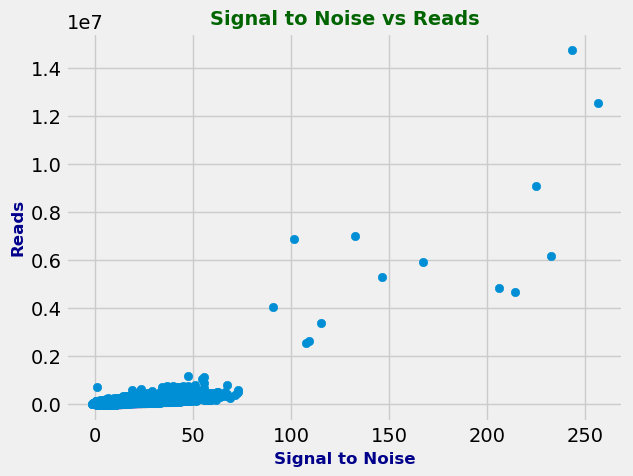

In [15]:
plt.scatter(df_train['signal_to_noise'], df_train['reads'])
plt.xlabel('Signal to Noise', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Reads', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Signal to Noise vs Reads', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
#plt.savefig('Signal to Noise vs Reads.png')

# Show the plot
plt.show()


## Create a heatmap to show the reactivity values across different positions.

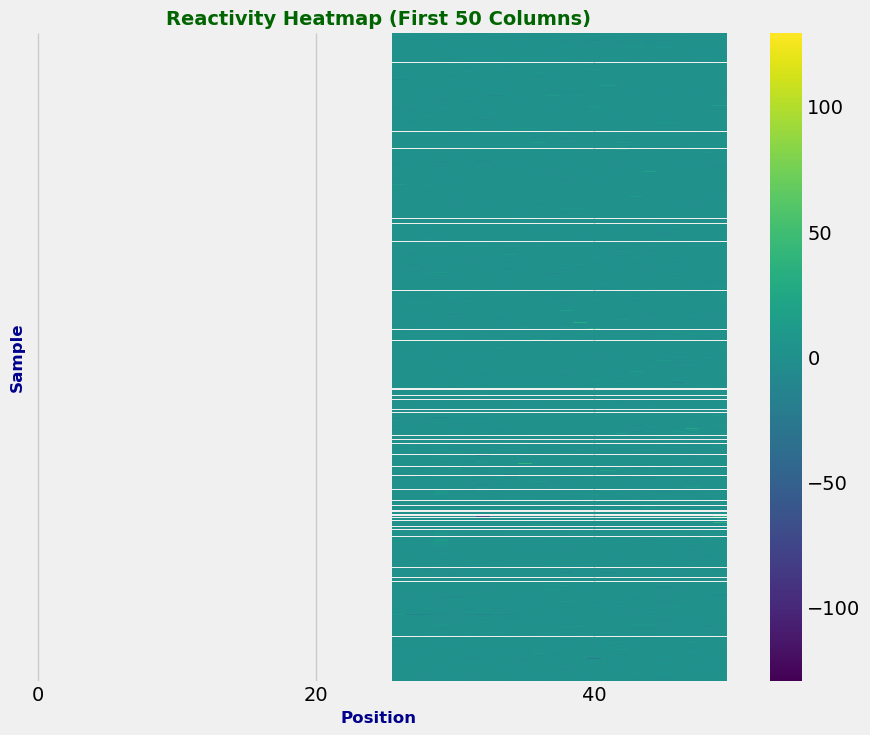

In [16]:
# Select only the first 50 reactivity columns
reactivity_columns = [col for col in df_train.columns if col.startswith('reactivity')][:50]
reactivity_data = df_train[reactivity_columns]

# Convert the reactivity data to a numpy array
reactivity_array = reactivity_data.values

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(reactivity_array, cmap='viridis', cbar=True, xticklabels=20, yticklabels=False)
plt.xlabel('Position', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Sample', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Reactivity Heatmap (First 50 Columns)', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
#plt.savefig('Reactivity Heatmap (First 50 Columns).png')

# Show the plot
plt.show()


## Plot the reactivity values with error bars.

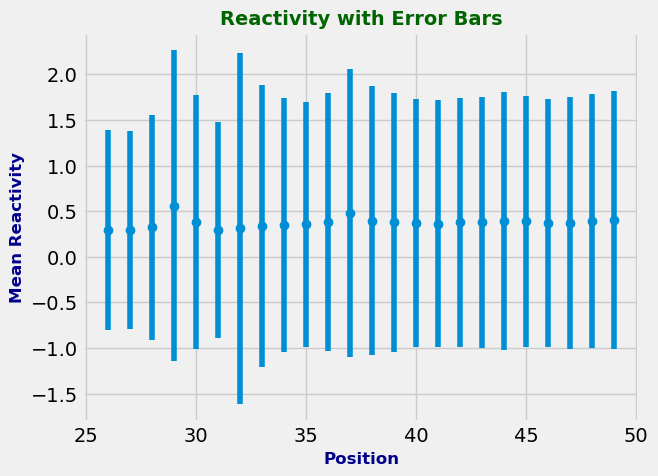

In [17]:
mean_reactivity = reactivity_data.mean(axis=0)
std_reactivity = reactivity_data.std(axis=0)

x = np.arange(len(mean_reactivity))
plt.errorbar(x, mean_reactivity, yerr=std_reactivity, fmt='o')
plt.xlabel('Position', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Mean Reactivity', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Reactivity with Error Bars', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
#plt.savefig('Reactivity with Error Bars.png')

# Show the plot
plt.show()


## Heatmap de corrélation (si variables numériques disponibles)

⚠️ Trop de colonnes numériques. Seules les 300 premières sont utilisées pour la heatmap.


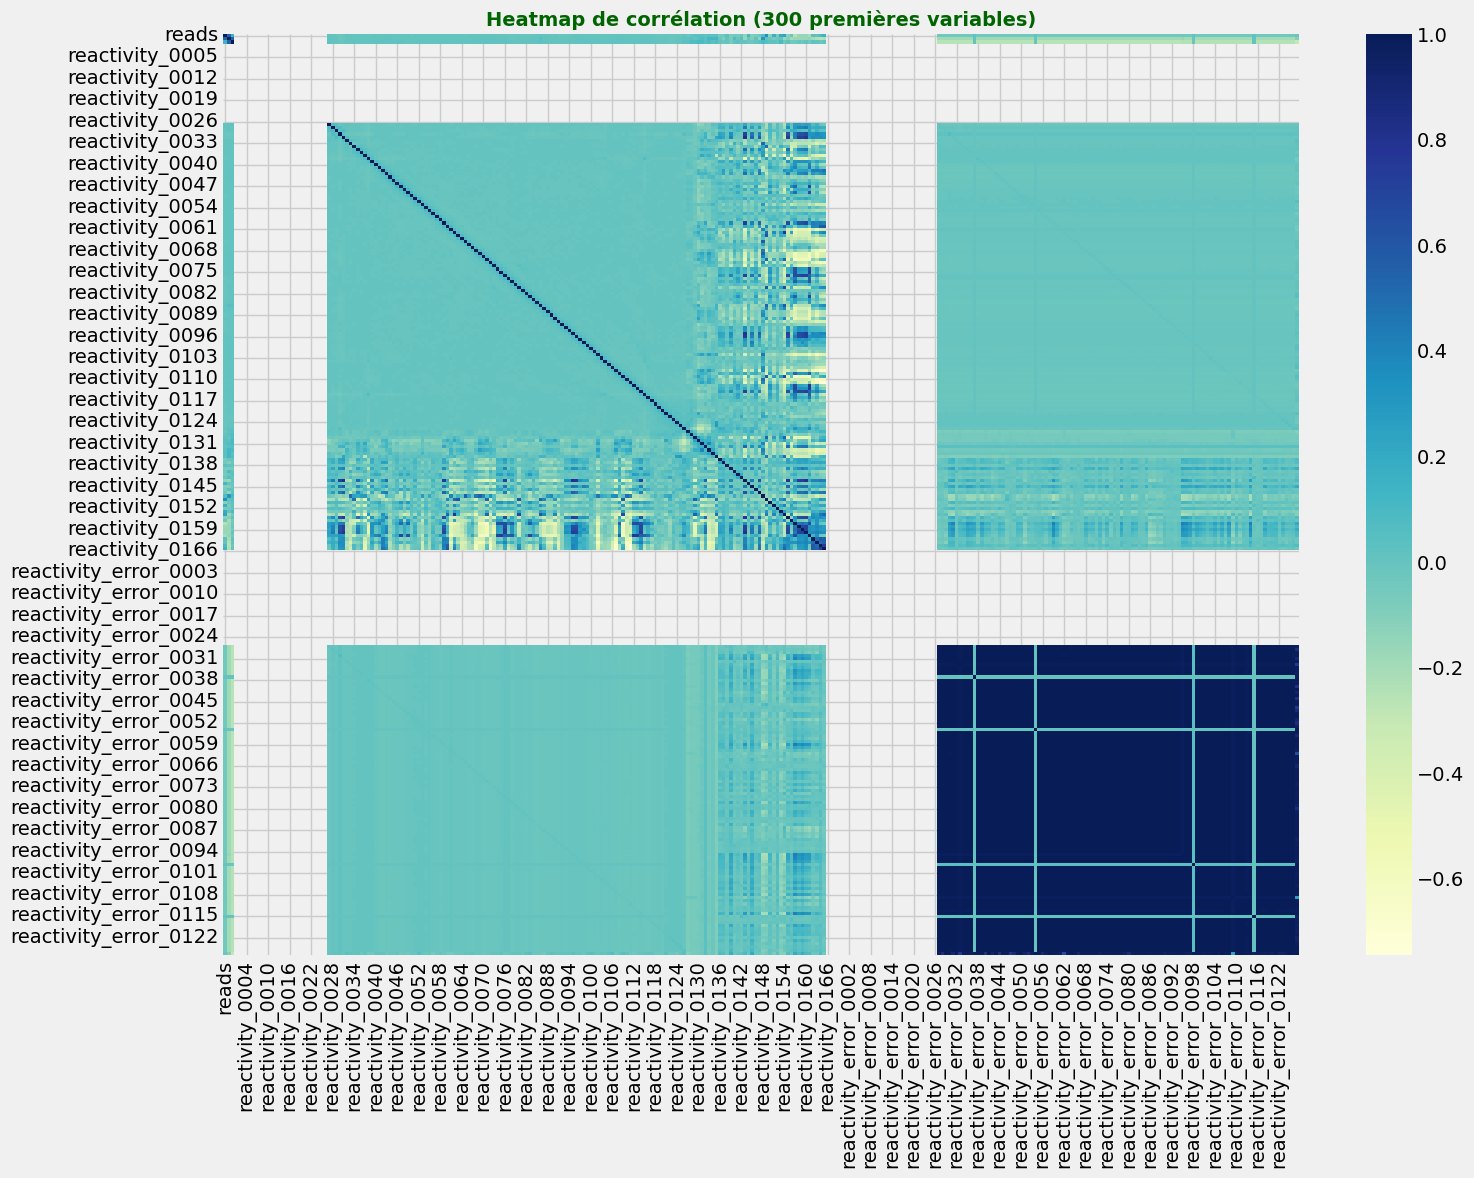

In [18]:
# Sélectionner les colonnes numériques uniquement
# Sélectionner uniquement les colonnes numériques
num_df = df_train.select_dtypes(include=[np.number])

# Si plus de 300 colonnes, on en garde seulement 300
if num_df.shape[1] > 300:
    num_df = num_df.iloc[:, :300]  # <-- on garde les 300 premières colonnes
    print(f"⚠️ Trop de colonnes numériques. Seules les 300 premières sont utilisées pour la heatmap.")

if not num_df.empty:
    corr = num_df.corr()
    plt.figure(figsize=(16,12))  # Agrandir la figure pour une meilleure lisibilité
    sns.heatmap(corr, annot=False, cmap='YlGnBu')  # annot=False pour alléger la figure si beaucoup de variables
    plt.title('Heatmap de corrélation (300 premières variables)', fontsize=14, fontweight='bold', color='darkgreen')
    plt.tight_layout()
    #plt.savefig('Correlation Heatmap 300 Vars.png')
    plt.show()
else:
    print("⚠️ Aucune colonne numérique pour faire une heatmap de corrélation.")


## Analyse de la distribution des valeurs uniques


In [19]:
# Nombre de valeurs uniques par colonne
unique_seq = df_train['sequence'].nunique()
print("=== Nombre de sequences uniques dans les données ===")
print(unique_seq)

=== Nombre de sequences uniques dans les données ===
806573


## Filtrage / nettoyage

### Paramètres


In [6]:
import pandas as pd
import numpy as np
# 🔹 Définir les seuils
reads_threshold = 100
SNR_threshold = 1.0

## Filtrage de Données

### 1. Filtrage selon la qualité (SN_filter = 1)

In [7]:
df_filtered_a = df_train[df_train['SN_filter'] == 1].copy()
print(f"Nombre de séquences après SN_filter=1 : {len(df_filtered_a)} "
      f"({len(df_filtered_a) / len(df_train) * 100:.1f}%)")

Nombre de séquences après SN_filter=1 : 437917 (26.6%)


In [8]:
#Filtrage selon reads et signal_to_noise
mask_quality = (df_filtered_a['reads'] >= reads_threshold) & (df_filtered_a['signal_to_noise'] >= SNR_threshold)
df_filtered_b = df_filtered_a[mask_quality].copy()
print(f"Nombre de séquences après filtrage reads/SNR : {len(df_filtered_b)} "
      f"({len(df_filtered_b)/len(df_train)*100:.1f}%)")

Nombre de séquences après filtrage reads/SNR : 437912 (26.6%)


### 2. Suppression des redondances — garder la meilleure expérience (signal_to_noise max)
Groupement par identifiant de séquence et type d'expérience


In [9]:
df_unique = (
    df_filtered_b
    .sort_values('signal_to_noise', ascending=False)
    .drop_duplicates(subset=['sequence', 'experiment_type'])
)
print(f"Nombre d'observations après suppression des doublons : {len(df_unique)} "
      f"({len(df_unique) / len(df_train) * 100:.1f}%)")

Nombre d'observations après suppression des doublons : 410703 (25.0%)


### 3. Conserver uniquement les séquences ayant des réactivités pour les 2 expériences (DMS et 2A3)
Vérifier combien d'expériences par séquence

In [10]:
seq_counts = df_unique.groupby('sequence')['experiment_type'].nunique()
valid_sequences = seq_counts[seq_counts == 2].index
df_filtered_c = df_unique[df_unique['sequence'].isin(valid_sequences)].copy()
print(f"Nombre d'observations avec DMS + 2A3 : {len(df_filtered_c)} "
      f"({len(df_filtered_c) / len(df_train) * 100:.1f}%)")
print(f"Nombre de séquences uniques : {df_filtered_c['sequence'].nunique()}")


Nombre d'observations avec DMS + 2A3 : 335956 (20.4%)
Nombre de séquences uniques : 167978


In [11]:
# Mélanger complètement le DataFrame
df_filtered_fin = df_filtered_c.sample(frac=1, random_state=42).reset_index(drop=True)
print("Données mélangées ✅")

Données mélangées ✅


RNA Sequence Length Distribution
   sequence_length  number_of_sequences
0              115                 2632
1              155                 1941
2              170                13627
3              177               147394
4              206                 2384


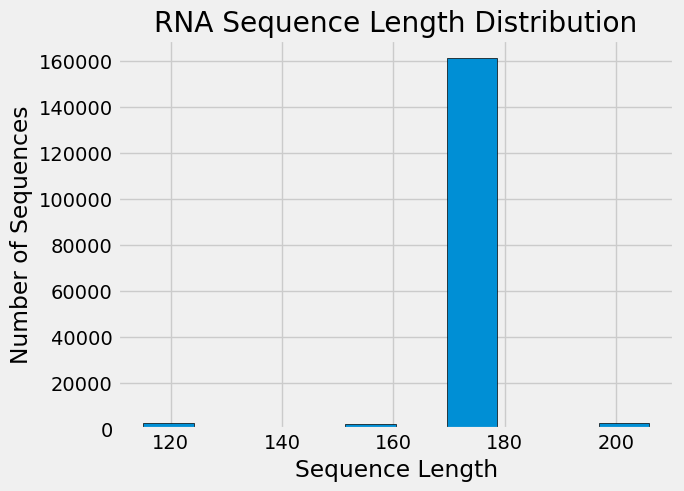

In [12]:
# Create a DataFrame containing unique sequences
unique_sequences_df = df_filtered_c.drop_duplicates(subset='sequence')

# Calculate the length of each unique sequence and create a histogram
sequence_lengths = unique_sequences_df['sequence'].str.len()

# Plot summary table
table = sequence_lengths.value_counts().sort_index()

# Rename the columns
table = table.reset_index()
table.columns = ['sequence_length', 'number_of_sequences']

# Print or visualize the updated histogram
print("RNA Sequence Length Distribution")
print(table)

# Plot a histogram
# Define the bin width and the number of bins
bin_width = 10  # Adjust this value to change the bin width
num_bins = int((sequence_lengths.max() - sequence_lengths.min()) / bin_width) + 1

# Create the histogram
plt.hist(sequence_lengths, bins=num_bins, edgecolor='k')

# Customize the plot
plt.title("RNA Sequence Length Distribution")
plt.xlabel("Sequence Length")
plt.ylabel("Number of Sequences")

# Show the plot
plt.show()

In [12]:
import pandas as pd
import plotly.express as px
import random

# Filtrer par type d'expérience
dms_df = df_filtered_c[df_filtered_c['experiment_type'] == 'DMS_MaP']
twoa3_df = df_filtered_c[df_filtered_c['experiment_type'] == '2A3_MaP']

# Fonction pour créer le violin plot avec Plotly Express
def create_violin_plot(data, title):
    # Colonnes contenant les valeurs de réactivité
    reactivity_columns = [f'reactivity_{i:04d}' for i in range(1, 207)]

    # Échantillonnage aléatoire pour réduire le nombre de points
    fraction_to_sample = 0.01
    sampled_data = data.sample(frac=fraction_to_sample, random_state=42)

    # Convertir en format long
    melted_data = sampled_data[reactivity_columns].melt()

    # Création du violin plot
    fig = px.violin(
        melted_data,
        y="value",
        box=True,
        points="all",
        width=800,
        height=400,
        title=title,
        labels={"value": "Reactivity Value"}
    )

    # Personnalisation de l'apparence
    fig.update_traces(marker=dict(size=3, opacity=0.5), line_color='black')
    fig.update_xaxes(showticklabels=False)

    # Affichage
    fig.show()

# Plot pour DMS_MaP
create_violin_plot(dms_df, "Distribution of Reactivity Values for DMS_MaP")

# Plot pour 2A3_MaP
create_violin_plot(twoa3_df, "Distribution of Reactivity Values for 2A3_MaP")

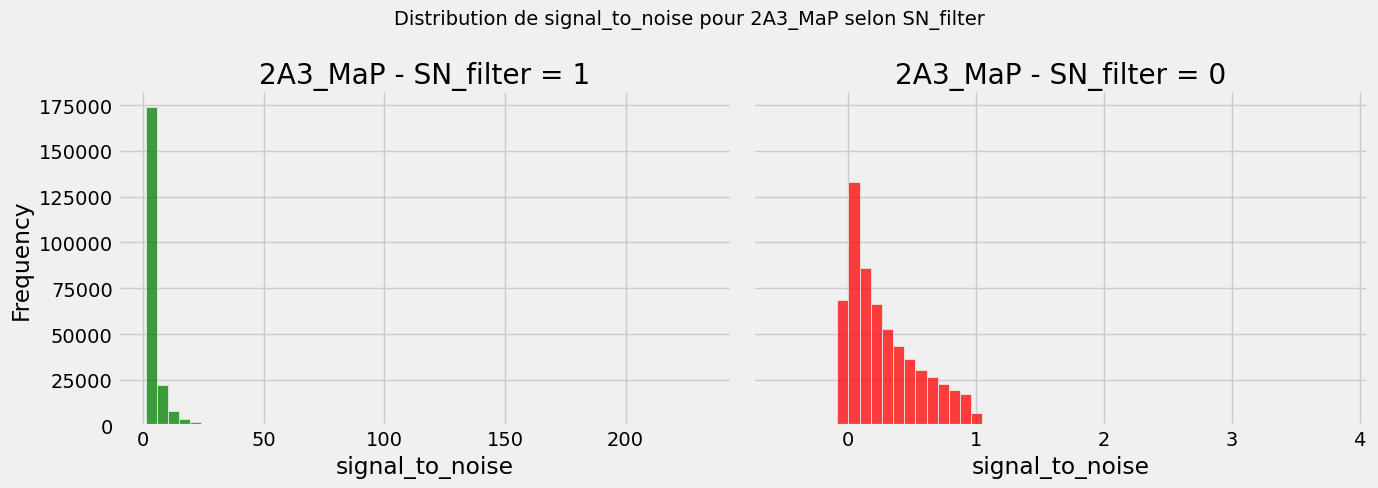

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des données 2A3 selon SN_filter
df_2A3 = df_train[df_train['experiment_type'] == '2A3_MaP']

sn1 = df_2A3[df_2A3['SN_filter'] == 1]['signal_to_noise']
sn0 = df_2A3[df_2A3['SN_filter'] == 0]['signal_to_noise']

# Création de la figure avec 2 sous-graphes
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.histplot(sn1, bins=50, ax=axes[0], color='green')
axes[0].set_title('2A3_MaP - SN_filter = 1')
axes[0].set_xlabel('signal_to_noise')
axes[0].set_ylabel('Frequency')

sns.histplot(sn0, bins=50, ax=axes[1], color='red')
axes[1].set_title('2A3_MaP - SN_filter = 0')
axes[1].set_xlabel('signal_to_noise')
axes[1].set_ylabel('Frequency')

plt.suptitle('Distribution de signal_to_noise pour 2A3_MaP selon SN_filter', fontsize=14)
plt.tight_layout()
plt.show()


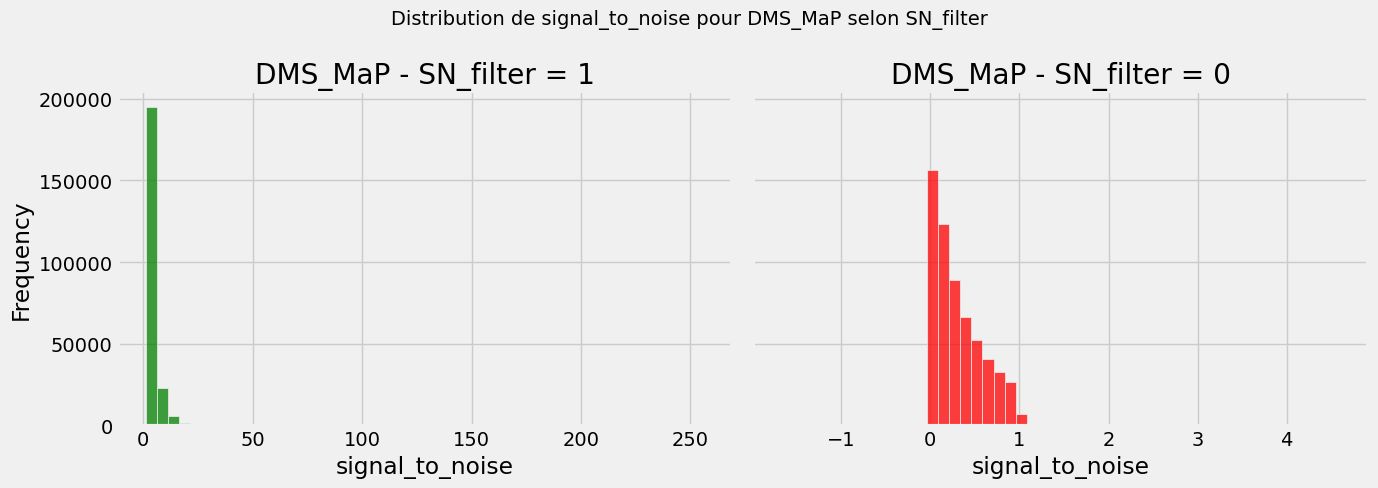

In [29]:
# Sélection des données DMS selon SN_filter
df_DMS = df_train[df_train['experiment_type'] == 'DMS_MaP']

sn1_DMS = df_DMS[df_DMS['SN_filter'] == 1]['signal_to_noise']
sn0_DMS = df_DMS[df_DMS['SN_filter'] == 0]['signal_to_noise']

# Création de la figure avec 2 sous-graphes
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.histplot(sn1_DMS, bins=50, ax=axes[0], color='green')
axes[0].set_title('DMS_MaP - SN_filter = 1')
axes[0].set_xlabel('signal_to_noise')
axes[0].set_ylabel('Frequency')

sns.histplot(sn0_DMS, bins=50, ax=axes[1], color='red')
axes[1].set_title('DMS_MaP - SN_filter = 0')
axes[1].set_xlabel('signal_to_noise')
axes[1].set_ylabel('Frequency')

plt.suptitle('Distribution de signal_to_noise pour DMS_MaP selon SN_filter', fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
# List of columns to remove
columns_to_remove = ["sequence_id", "dataset_name", "reads", "SN_filter"]

# Find columns containing "reactivity_error" in their names
reactivity_error_columns = [col for col in df_filtered_fin.columns if "reactivity_error" in col]

# Combine the columns to remove
columns_to_remove.extend(reactivity_error_columns)

# Drop the specified columns from the DataFrame
df_filtered_fin = df_filtered_fin.drop(columns=columns_to_remove)
df_filtered_fin.head()

sequence experiment_type  \
0  GGGAACGACUCGAGUAGAGUCGAAAAUGAUCUUCUCUCUUCACCCC...         2A3_MaP   
1  GGGAACGACUCGAGUAGAGUCGAAAAUGAAUAAGCAUGCAUUCCAC...         DMS_MaP   
2  GGGAACGACUCGAGUAGAGUCGAAAAAUGACAUGUAUAUUCAGGCA...         DMS_MaP   
3  GGGAACGACUCGAGUAGAGUCGAAAAUAGGCAAAUCCGCAGAUCUA...         2A3_MaP   
4  GGGAACGACUCGAGUAGAGUCGAAAAUAUACAUAAGAAGUCCGCGC...         DMS_MaP   

   signal_to_noise  reactivity_0001  reactivity_0002  reactivity_0003  \
0            1.113              NaN              NaN              NaN   
1            1.276              NaN              NaN              NaN   
2            1.102              NaN              NaN              NaN   
3            5.795              NaN              NaN              NaN   
4            1.028              NaN              NaN              NaN   

   reactivity_0004  reactivity_0005  reactivity_0006  reactivity_0007  ...  \
0              NaN              NaN              NaN              NaN  ...   
1              NaN              NaN              NaN              NaN  ...   
2              NaN              NaN              NaN              NaN  ...   
3              NaN              NaN              NaN              NaN  ...   
4              NaN              NaN              NaN              NaN  ...   

   reactivity_0197  reactivity_0198  reactivity_0199  reactivity_0200  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              NaN              NaN              NaN              NaN   

   reactivity_0201  reactivity_0202  reactivity_0203  reactivity_0204  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              NaN              NaN              NaN              NaN   

   reactivity_0205  reactivity_0206  
0              NaN              NaN  
1              NaN              NaN  
2              NaN              NaN  
3              NaN              NaN  
4              NaN              NaN  

[5 rows x 209 columns]

### 4. Split en train / val / test

In [14]:
from sklearn.model_selection import train_test_split

#### split séquences uniques d'abord

In [15]:
unique_seqs = df_filtered_fin['sequence'].unique()
train_seqs, temp_seqs = train_test_split(unique_seqs, test_size=0.30, random_state=42)
val_seqs, test_seqs = train_test_split(temp_seqs, test_size=0.40, random_state=42)

### création des sous-jeux

In [16]:
df_train = df_filtered_fin[df_filtered_fin['sequence'].isin(train_seqs)].copy()
df_val = df_filtered_fin[df_filtered_fin['sequence'].isin(val_seqs)].copy()
df_test = df_filtered_fin[df_filtered_fin['sequence'].isin(test_seqs)].copy()

print(f"Train : {len(df_train)} ({len(df_train)/len(df_filtered_fin)*100:.1f}%)")
print(f"Val   : {len(df_val)} ({len(df_val)/len(df_filtered_fin)*100:.1f}%)")
print(f"Test  : {len(df_test)} ({len(df_test)/len(df_filtered_fin)*100:.1f}%)")

Train : 235168 (70.0%)
Val   : 60472 (18.0%)
Test  : 40316 (12.0%)


In [15]:
df_train.to_csv('df_train_filtered.csv', index=False)
df_val.to_csv('df_val_filtered.csv', index=False)
df_test.to_csv('df_test_filtered.csv', index=False)

## Features engignering (Normalisation encoding et padding)

In [17]:
import numpy as np
import pandas as pd

def process_dataframe_fast(df, max_len=457):
    """
    Version optimisée du traitement des séquences :
    - One-hot encoding
    - Normalisation robuste
    - Padding
    - Utilise un dictionnaire indexé plutôt que des filtres dans chaque boucle
    """
    mapping = {'A':0, 'C':1, 'G':2, 'U':3}
    factor = 1.4826
    
    # 1. Indexation des données pour accès rapide
    grouped = df.groupby(['sequence', 'experiment_type'])
    dms_dict = {}
    a3_dict = {}
    
    for (seq, exp), subdf in grouped:
        row = subdf.iloc[0]
        values = [row[f'reactivity_{i+1:04d}'] for i in range(len(seq))]
        if exp == 'DMS_MaP':
            dms_dict[seq] = np.array(values)
        elif exp == '2A3_MaP':
            a3_dict[seq] = np.array(values)
    
    unique_sequences = df['sequence'].unique()
    
    # 2. Pré-collecte des valeurs pour normalisation
    dms_values = np.concatenate([v[~np.isnan(v)] for v in dms_dict.values() if v is not None])
    a3_values  = np.concatenate([v[~np.isnan(v)] for v in a3_dict.values() if v is not None])
    
    dms_median = np.nanmedian(dms_values)
    dms_mad    = np.nanmedian(np.abs(dms_values - dms_median))
    a3_median  = np.nanmedian(a3_values)
    a3_mad     = np.nanmedian(np.abs(a3_values - a3_median))
    
    print(f"[INFO] DMS median={dms_median:.3f}, MAD={dms_mad:.3f}")
    print(f"[INFO] 2A3 median={a3_median:.3f}, MAD={a3_mad:.3f}")
    
    # 3. Création du tensor par séquence
    result_list = []
    for seq in unique_sequences:
        seq_len = len(seq)
        tensor = np.zeros((max_len, 6), dtype=np.float32)
        
        # One-hot encoding rapide
        for i, nuc in enumerate(seq):
            if i >= max_len: break
            if nuc in mapping:
                tensor[i, mapping[nuc]] = 1
        
        # Ajout réactivités normalisées
        dms_vals = dms_dict.get(seq, np.full(seq_len, np.nan))
        a3_vals  = a3_dict.get(seq, np.full(seq_len, np.nan))
        
        if len(dms_vals) > 0:
            dms_norm = np.nan_to_num((dms_vals - dms_median) / (factor * dms_mad))
            tensor[:min(seq_len, max_len), 4] = dms_norm[:max_len]
        if len(a3_vals) > 0:
            a3_norm = np.nan_to_num((a3_vals - a3_median) / (factor * a3_mad))
            tensor[:min(seq_len, max_len), 5] = a3_norm[:max_len]
        
        result_list.append(tensor)
    
    return result_list
# Exemple d'utilisation 
ohe_filtered_train_data = process_dataframe_fast(df_filtered_fin) 
print(f"Nombre de séquences traitées : {len(ohe_filtered_train_data)}") 
print(f"Taille de la première séquence : {ohe_filtered_train_data[0].shape}")

[INFO] DMS median=0.123, MAD=0.133
[INFO] 2A3 median=0.212, MAD=0.212
Nombre de séquences traitées : 167978
Taille de la première séquence : (457, 6)


## Encodage des séquences

In [18]:
# 🟡 2. Transformation des trois jeux
ohe_train_data = process_dataframe_fast(df_train)
ohe_test_data  = process_dataframe_fast(df_test)
ohe_val_data   = process_dataframe_fast(df_val)

print(f"Train : {len(ohe_train_data)} séquences")
print(f"Test  : {len(ohe_test_data)} séquences")
print(f"Val   : {len(ohe_val_data)} séquences")


[INFO] DMS median=0.123, MAD=0.133
[INFO] 2A3 median=0.212, MAD=0.212
[INFO] DMS median=0.123, MAD=0.133
[INFO] 2A3 median=0.213, MAD=0.213
[INFO] DMS median=0.123, MAD=0.133
[INFO] 2A3 median=0.212, MAD=0.212
Train : 117584 séquences
Test  : 20158 séquences
Val   : 30236 séquences


In [19]:
import numpy as np

def split_X_Y(tensor_list):
    """
    Sépare X (features) et Y (targets) à partir d'une liste de tableaux numpy.
    Chaque tableau est de la forme (seq_len, 6) : 4 colonnes one-hot + 2 réactivités.
    
    Args:
        tensor_list (list of np.ndarray): Liste de séquences traitées.
    
    Returns:
        X: np.ndarray de shape (n_samples, seq_len, 4)
        Y: np.ndarray de shape (n_samples, seq_len, 2)
    """
    X_list = []
    Y_list = []
    
    for tensor in tensor_list:
        X_list.append(tensor[:, :4])  # 4 colonnes de one-hot
        Y_list.append(tensor[:, 4:])  # 2 colonnes de réactivités normalisées
    
    X = np.stack(X_list)
    Y = np.stack(Y_list)
    return X, Y


In [20]:
X_train, Y_train = split_X_Y(ohe_train_data)
X_val, Y_val = split_X_Y(ohe_val_data)
X_test, Y_test = split_X_Y(ohe_test_data)

print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_val:", X_val.shape)
print("Y_val:", Y_val.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)


X_train: (117584, 457, 4)
Y_train: (117584, 457, 2)
X_val: (30236, 457, 4)
Y_val: (30236, 457, 2)
X_test: (20158, 457, 4)
Y_test: (20158, 457, 2)


In [21]:
print("all done ✅")


all done ✅


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Bidirectional, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Mask pour ignorer le padding (valeurs nulles dans Y)
mask_train = (Y_train != 0).any(axis=2).astype(float)
mask_val   = (Y_val != 0).any(axis=2).astype(float)
mask_test  = (Y_test != 0).any(axis=2).astype(float)


In [ ]:
import tensorflow as tf
from tensorflow import keras

# --- Fonctions de métriques avec masquage ---

def masked_mse(y_true, y_pred):
    mask = tf.cast(tf.reduce_any(tf.not_equal(y_true, 0), axis=2, keepdims=True), tf.float32)
    mse = tf.reduce_sum((y_true - y_pred)**2 * mask) / tf.reduce_sum(mask)
    return mse

def masked_mae(y_true, y_pred):
    mask = tf.cast(tf.reduce_any(tf.not_equal(y_true, 0), axis=2, keepdims=True), tf.float32)
    mae = tf.reduce_sum(tf.abs(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mae

def masked_rmse(y_true, y_pred):
    return tf.sqrt(masked_mse(y_true, y_pred))


# --- Définition du modèle LSTM simple ---
def simple_lstm(input_size=(457, 4), output_size=2, to_compile=True, **kwargs):
    hidden_size = kwargs.get("hidden_size", 64)
    
    model = keras.Sequential([
        keras.layers.Input(shape=input_size),
        keras.layers.LSTM(units=hidden_size, return_sequences=True),
        keras.layers.Dense(units=output_size, activation='linear')
    ])
    
    if to_compile:
        model.compile(
            optimizer='adam',
            loss=masked_mse,
            metrics=[masked_mse, masked_mae, masked_rmse]
        )
    return model


# --- Création du modèle ---
model = simple_lstm(input_size=(457, 4), output_size=2, hidden_size=64)

# --- Résumé ---
model.summary()

# --- Callback pour arrêt anticipé ---
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# --- Entraînement ---
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop]
)

# --- Évaluation sur le test ---
results = model.evaluate(X_test, Y_test, verbose=1)
print(f"\n📊 Test Results :\nLoss (MSE masqué): {results[0]:.5f}\nMSE: {results[1]:.5f}\nMAE: {results[2]:.5f}\nRMSE: {results[3]:.5f}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 457, 64)        │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 457, 2)         │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,794 (69.51 KB)

 Trainable params: 17,794 (69.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 156s 169ms/step - loss: 11.3386 - masked_mae: 2.8112 - masked_mse: 11.3393 - masked_rmse: 3.3628 - val_loss: 10.6397 - val_masked_mae: 2.7101 - val_masked_mse: 10.6374 - val_masked_rmse: 3.2595
Epoch 2/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 151s 164ms/step - loss: 10.4233 - masked_mae: 2.6643 - masked_mse: 10.4242 - masked_rmse: 3.2261 - val_loss: 10.1351 - val_masked_mae: 2.6391 - val_masked_mse: 10.1331 - val_masked_rmse: 3.1812
Epoch 3/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 145s 157ms/step - loss: 10.0810 - masked_mae: 2.6062 - masked_mse: 10.0808 - masked_rmse: 3.1725 - val_loss: 9.8918 - val_masked_mae: 2.5933 - val_masked_mse: 9.8901 - val_masked_rmse: 3.1428
Epoch 4/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 146s 159ms/step - loss: 9.9118 - masked_mae: 2.5790 - masked_mse: 9.9114 - masked_rmse: 3.1455 - val_loss: 9.7647 - val_masked_mae: 2.5407 - val_masked_mse: 9.7631 - val_masked_rmse: 3.1225
Epoch 5/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 145s 158ms/step - loss: 9.7962

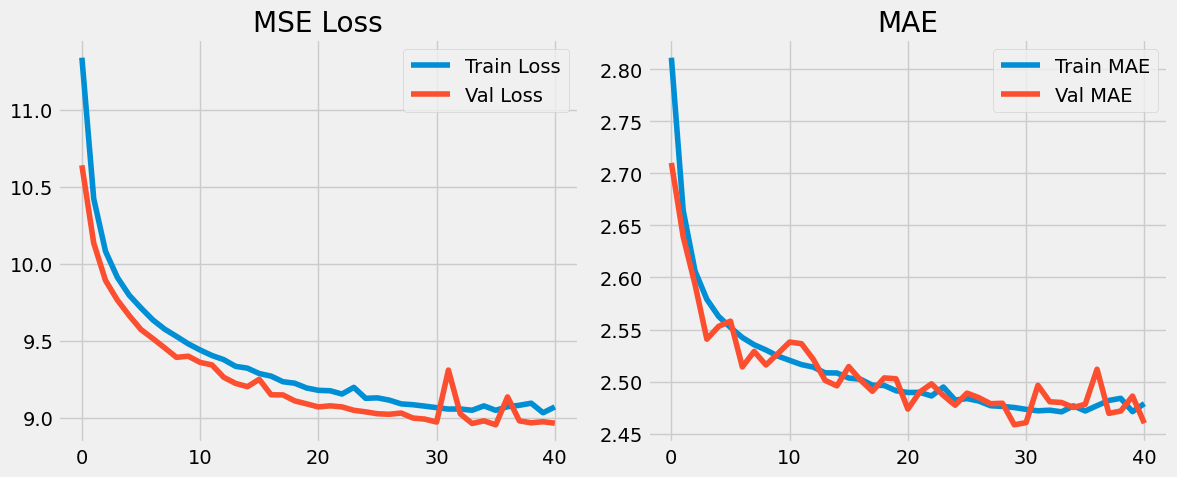

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('MSE Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['masked_mae'], label='Train MAE')
    plt.plot(history.history['val_masked_mae'], label='Val MAE')
    plt.title('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)